In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


**Question 1**

**Delivery_time** -> Predict delivery time using sorting time

Build a **simple linear regression** model by performing EDA and do necessary transformations and select the **best model** using R or Python.

In [ ]:
deltime=pd.read_csv("delivery_time.csv")

In [ ]:
deltime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


**Data Understanding**

In [ ]:
deltime.shape

(21, 2)

In [ ]:
deltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


**Checking null values**

In [ ]:
deltime.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

**Applying Descriptive Statistics**

In [ ]:
deltime.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


**Renaming the columns**

In [ ]:
deltime = deltime.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
deltime

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**Plotting the data to check the outliers**

Text(0.5, 1.0, 'Sorting time')

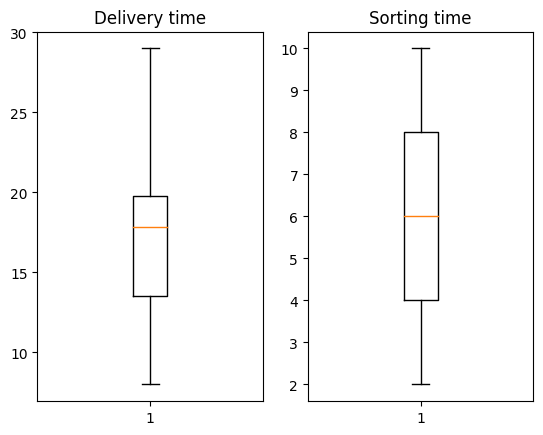

In [ ]:
plt.subplot(121)
plt.boxplot(deltime['Delivery_Time'])
plt.title("Delivery time")
plt.subplot(122)
plt.boxplot(deltime['Sorting_Time'])
plt.title("Sorting time")

**As we can see there is no outliers in the data**

**Checking the correation  between the variables**

In [ ]:
deltime.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


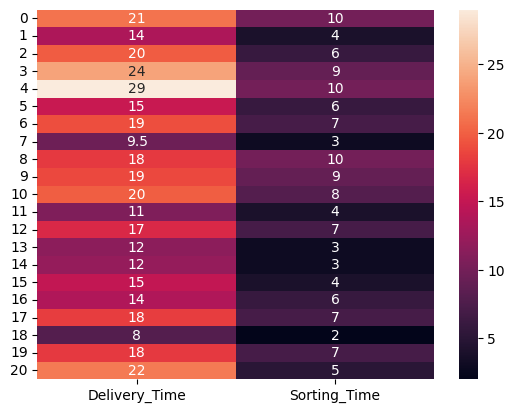

In [ ]:
sns.heatmap(data=deltime,annot=True)
plt.show()

**Visualization of correlation of x and y**

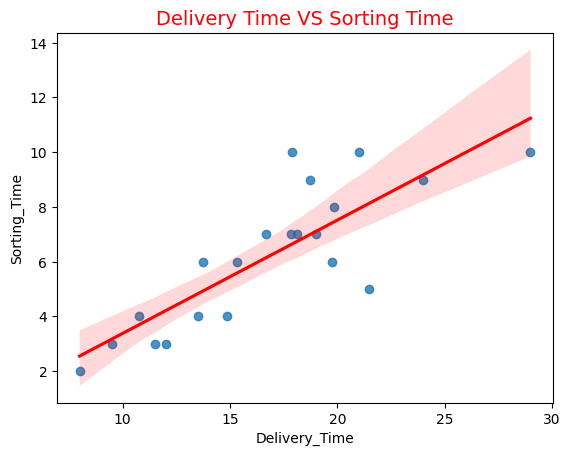

In [ ]:
sns.regplot(x='Delivery_Time',y='Sorting_Time',data=deltime,line_kws={'color':"Red"})
plt.title("Delivery Time VS Sorting Time",fontsize=14,color="Red")
plt.show()

As we can see above
      There is not much good correlation between the two variable.

**Checking for Homoscedasticity or Hetroscedasticity**

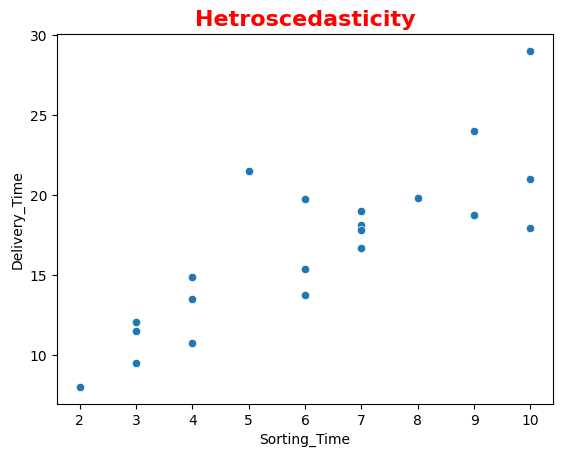

In [ ]:
df=deltime
sns.scatterplot(x='Sorting_Time', y ='Delivery_Time',data=df)
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16,color="Red")
plt.show()

In [ ]:
deltime.var()

Delivery_Time    25.754619
Sorting_Time      6.461905
dtype: float64

**As we can see in above graph**



*   It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way


*   The data doesn't have any specific pattern in the variation, but we can't say the variation is Hetroscedasticity.






**Trying different transformation of data to estimate normal distribution and to remove any skewness**

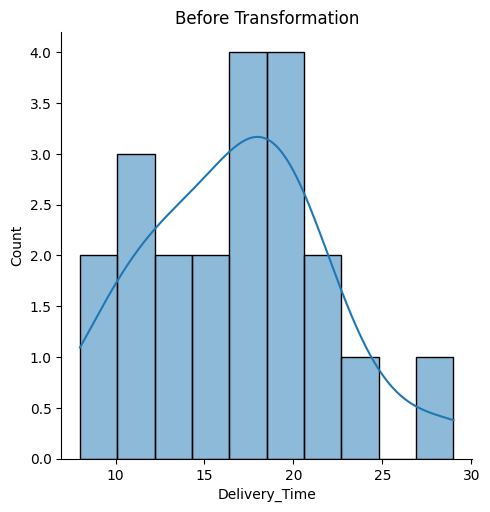

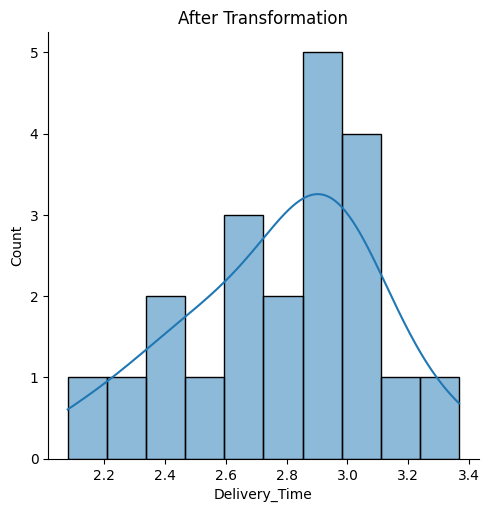

In [ ]:
sns.displot(deltime['Delivery_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(deltime['Delivery_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

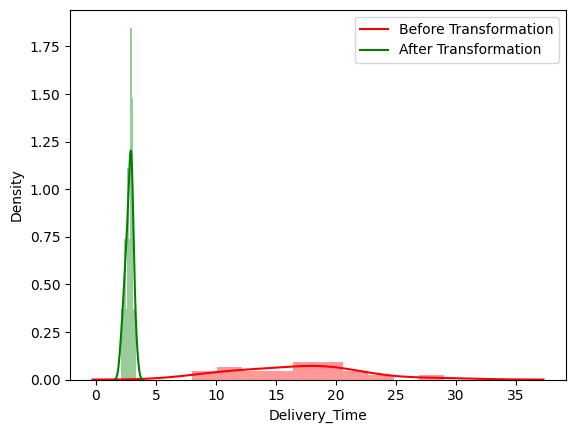

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(deltime['Delivery_Time'], bins = 10, kde = True,color='Red')
sns.distplot(np.log(deltime['Delivery_Time']), bins = 10, kde = True,color="Green")
plt.legend(labels)
plt.show()


**As we can see**

*  How log transformation affects the data and it scales the values down.




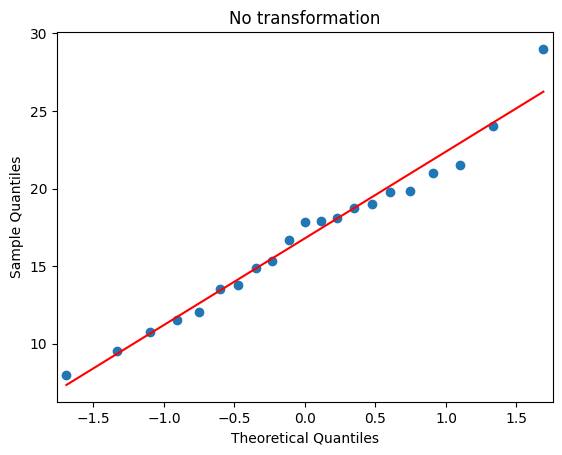

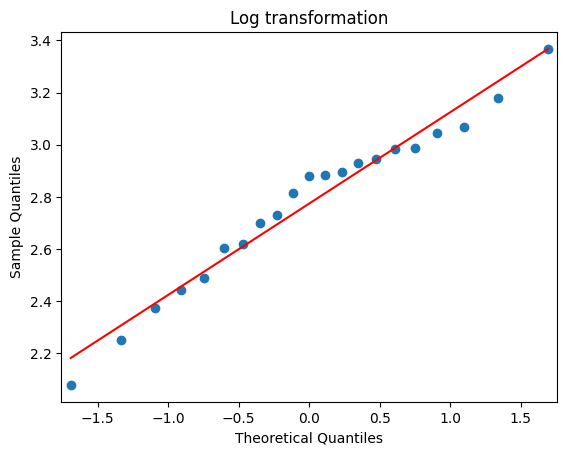

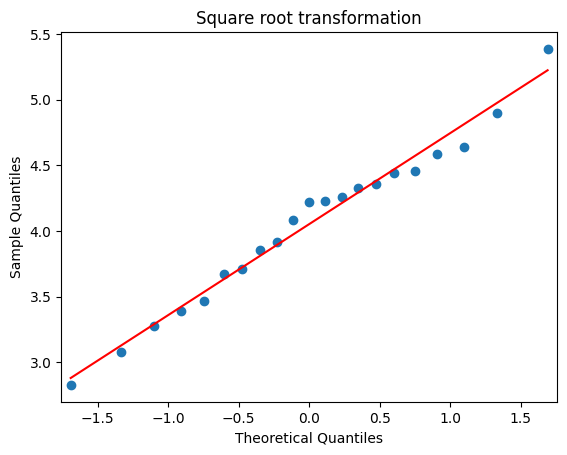

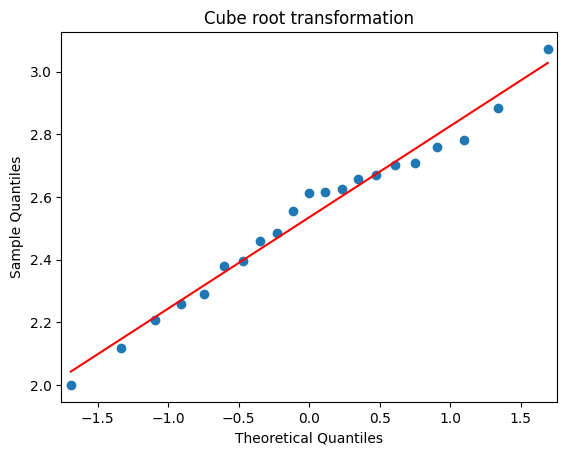

In [ ]:
import statsmodels.api as sm
sm.qqplot(deltime['Delivery_Time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(deltime['Delivery_Time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(deltime['Delivery_Time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(deltime['Delivery_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

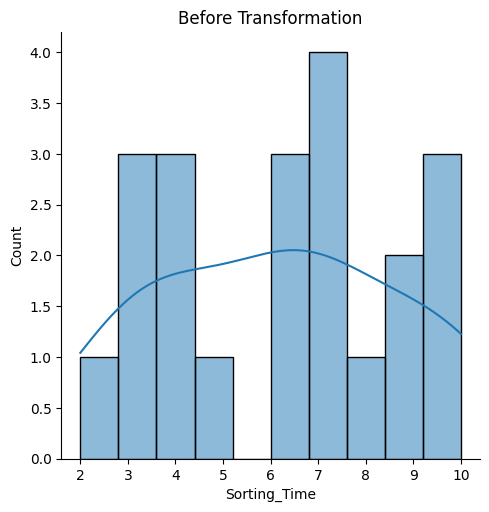

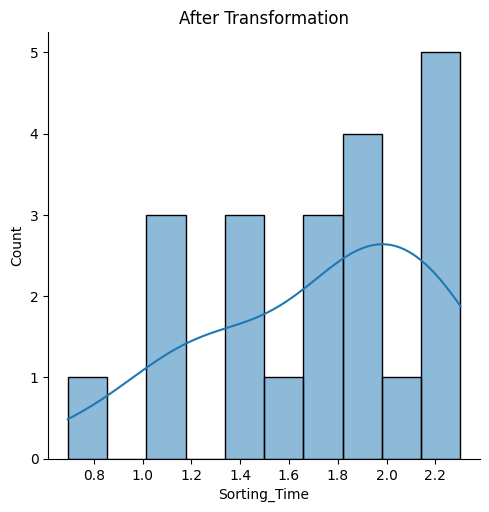

In [ ]:
sns.displot(deltime['Sorting_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(deltime['Sorting_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

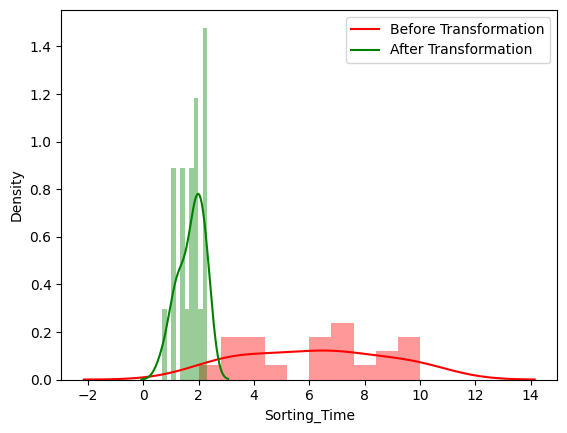

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(deltime['Sorting_Time'], bins = 10, kde = True,color='Red')
sns.distplot(np.log(deltime['Sorting_Time']), bins = 10, kde = True,color="Green")
plt.legend(labels)
plt.show()

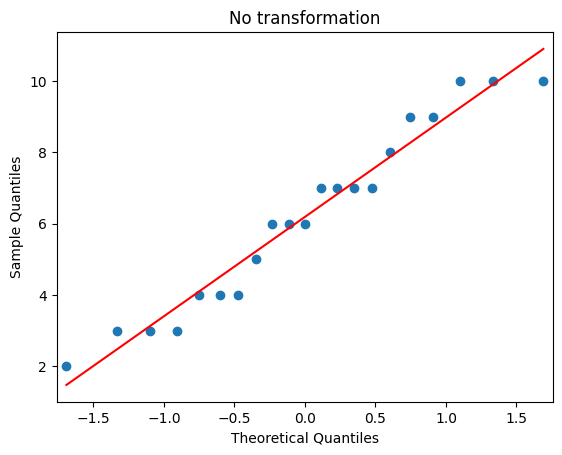

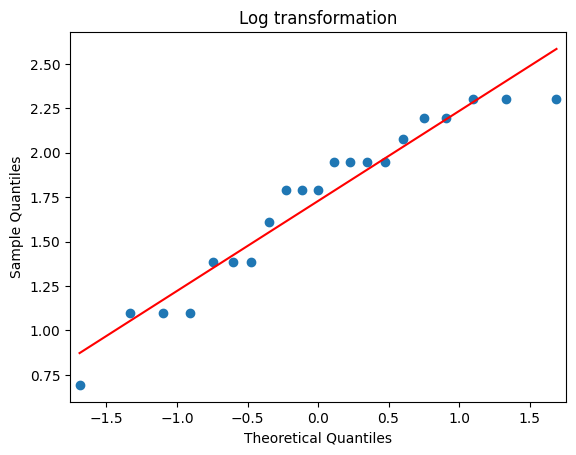

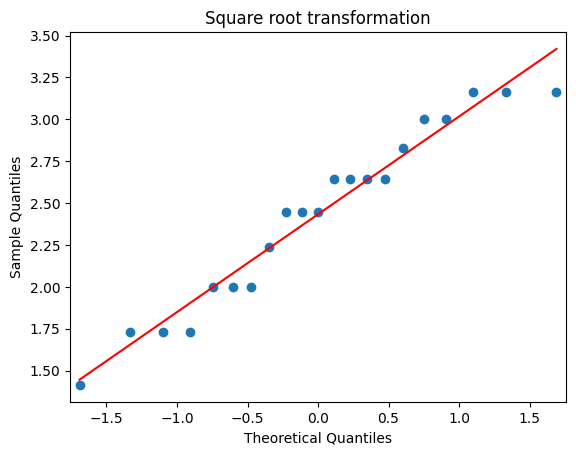

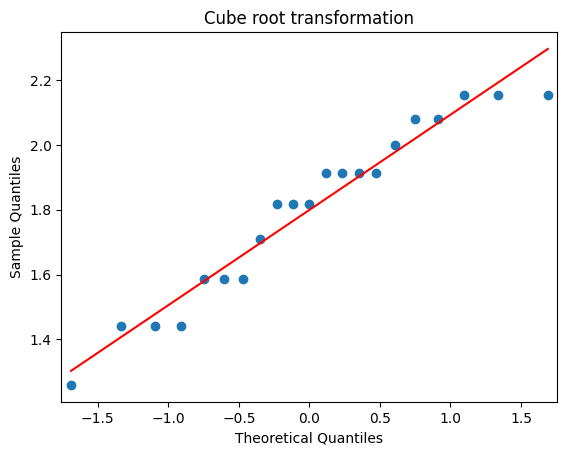

In [ ]:
sm.qqplot(deltime['Sorting_Time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(deltime['Sorting_Time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(deltime['Sorting_Time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(deltime['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

**Note**

We only perform data transformation,when the data is skewed or not,Normal distribution N(0,1)



**Using Ordinary Least Squares (OLS) regression**


It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.

In [ ]:
linear_model = smf.ols('Delivery_Time~Sorting_Time', data = deltime).fit()

In [ ]:
print('R-squared     :',linear_model.rsquared.round(3)) #Overall Contribution of Predictors
print('Adj.R-squared :',linear_model.rsquared_adj.round(3)) #Overall Contribution of Predictors
print('AIC Value     :',linear_model.aic.round(3)) #Error Impurity
print('BIC Value     :',linear_model.bic.round(3)) #Error Impurity

R-squared     : 0.682
Adj.R-squared : 0.666
AIC Value     : 106.714
BIC Value     : 108.803


**As we can notice in the above model**

*   The R-squared and Adjusted R-squared scores are still below 0.85.
*   Lets Try some data transformation to check whether these scores can get any higher than this.

**square transformation of data**

In [ ]:
linear_model1=smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)',data=deltime).fit()

In [ ]:
print('R-squared     :',linear_model1.rsquared.round(3))
print('Adj.R-squared :',linear_model1.rsquared_adj.round(3))
print('AIC Value     :',linear_model1.aic.round(3))
print('BIC Value     :',linear_model1.bic.round(3))

R-squared     : 0.729
Adj.R-squared : 0.715
AIC Value     : 15.464
BIC Value     : 17.553


**As we can notice in the above model**

*  After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85.

*  Lets Try other data transformation to check whether these scores can get any higher than this.



**Cube Root Transformation**

In [ ]:
linear_model2=smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)',data=deltime).fit()

In [ ]:
print('R-squared      :',linear_model2.rsquared.round(3))
print('Adj.R_sqyared  :',linear_model2.rsquared_adj.round(3))
print('AIC Value      :',linear_model2.aic.round(3))
print('BIC Value      :',linear_model2.bic.round(3))

R-squared      : 0.744
Adj.R_sqyared  : 0.731
AIC Value      : -22.071
BIC Value      : -19.982


**Log Transformation on data**

In [ ]:
linear_model3=smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=deltime).fit()

In [ ]:
print('R-squared     :',linear_model3.rsquared.round(3))
print('Adj.R-squared :',linear_model3.rsquared_adj.round(3))
print('AIC Value     :',linear_model3.aic.round(3))
print('BIC Vlaue     :',linear_model3.bic.round(3))

R-squared     : 0.772
Adj.R-squared : 0.76
AIC Value     : -16.581
BIC Vlaue     : -14.492


**As we can notice in the above model**

* After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model  

* Yet both Adjusted R-squared and R-squared scores are still below 0.78.
*  Though it is now close to 0.80 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.



**Model Testing**

As Y = Beta0 + Beta1*(X)

**Finding coefficient parameters**(**Beta0 and Beta1** values)

In [ ]:
linear_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64


Here, (Intercept) Beta0 value = 6.58 & (Sorting Time) Beta1 value = 1.64

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [ ]:
print(linear_model.tvalues,'\n',linear_model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


(**Intercept**) Beta0: tvalue=3.82 , pvalue=0.001147

(**daily**) Beta1: tvalue=6.38,pvalue=0.000004

As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable.

R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

Measure goodness-of-fit by finding rsquared values (percentage of variance

In [ ]:
linear_model.rsquared, linear_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

**Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%**

**Residual Analysis**

Test for Normality of Residuals (Q-Q Plot)

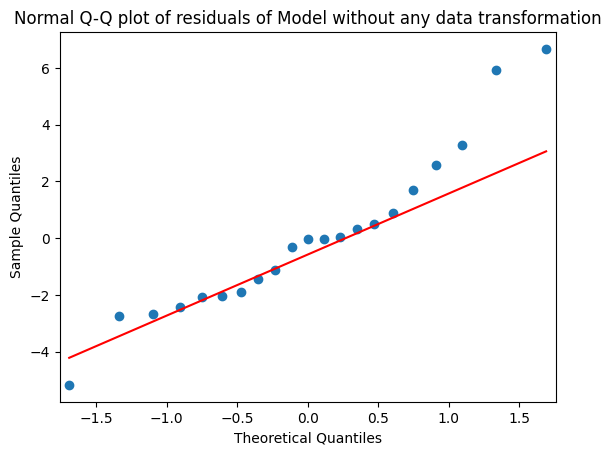

In [ ]:
sm.qqplot(linear_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()


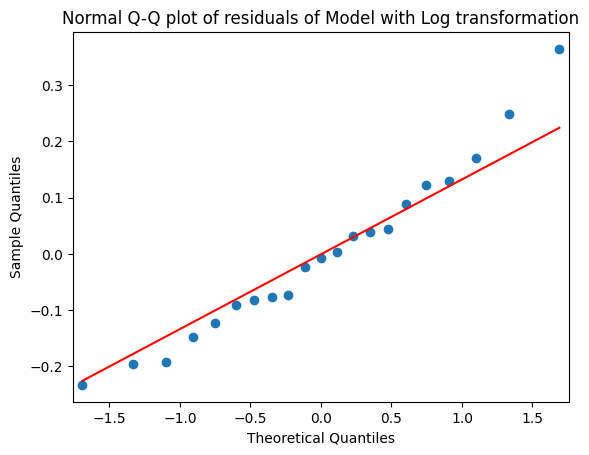

In [ ]:
sm.qqplot(linear_model3.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

As we can notice in the above plots


* Both The Model have slightly different plots   
* The first model is right skewed and doesn't follow normal distribution
* The second model after log-transformation follows normal distributon with less skewness than first model






**Residual Plot to check Homoscedasticity or Hetroscedasticity**

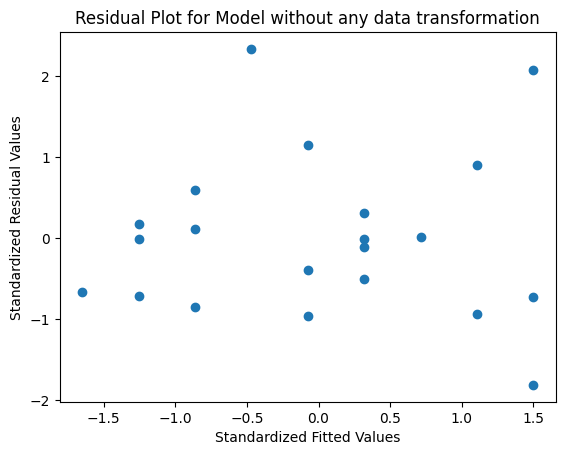

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(linear_model.fittedvalues), get_standardized_values(linear_model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

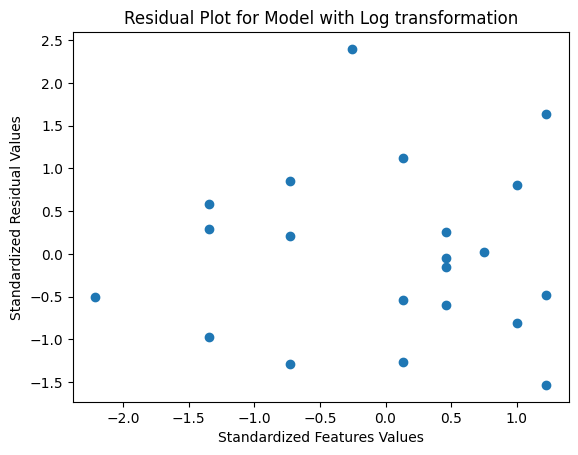

In [ ]:
plt.scatter(get_standardized_values(linear_model3.fittedvalues), get_standardized_values(linear_model3.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

**As we can notice in the above plots**


*   Both The Model have Homoscedasciticity.
*   The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
*   Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed




**Model Validation**

**Comparing different models with respect to their Root Mean Squared Errors**

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
linear_model1_pred_y =np.square(linear_model1.predict(deltime['Sorting_Time']))
linear_model2_pred_y =pow(linear_model2.predict(deltime['Sorting_Time']),3)
linear_model3_pred_y =np.exp(linear_model3.predict(deltime['Sorting_Time']))

In [ ]:
linear_model1_rmse =np.sqrt(mean_squared_error(deltime['Delivery_Time'], linear_model1_pred_y))
linear_model2_rmse =np.sqrt(mean_squared_error(deltime['Delivery_Time'], linear_model2_pred_y))
linear_model3_rmse =np.sqrt(mean_squared_error(deltime['Delivery_Time'], linear_model3_pred_y))
print('Linear Model =', np.sqrt(linear_model.mse_resid),'\n' 'Linear Model1=', linear_model1_rmse,'\n' 'Linear Model2=', linear_model2_rmse,'\n' 'Linear Model3=', linear_model3_rmse)

Linear Model = 2.934903768890139 
Linear Model1= 2.762294279320867 
Linear Model2= 2.755584309893576 
Linear Model3= 2.745828897614548


In [ ]:
data = {'Linear Model': np.sqrt(linear_model.mse_resid), 'Linear Model1': linear_model1_rmse, 'Linear Model2': linear_model3_rmse, 'Linear Model3' : linear_model3_rmse}
min(data, key=data.get)

'Linear Model2'


As 'Linear Model2' has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use Linear 'Linear Model2' to predict our values

'Linear Model2' is the model where we did log transformation on both dependent variable as well as on independent variable

**Predicitng from original model without any data transformation**

In [ ]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = deltime.Sorting_Time
predicted1['Delivery_Time']=deltime.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(linear_model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


** Predicting values from model with log transformation on the data**

In [ ]:
predicted2 = pd.DataFrame()
predicted2['Sorting_Time'] = deltime.Sorting_Time
predicted2['Delivery_Time'] = deltime.Delivery_Time
predicted2['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(linear_model2.predict(predicted2.Sorting_Time)))
predicted2

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


**Question2**

Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
from google.colab import files
uploded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
salary=pd.read_csv("Salary_Data.csv")

In [ ]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**performing EDA on data**

**Data Understanding**

In [ ]:
salary.shape

(30, 2)

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Checking null values**

In [ ]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

**Plotting the data to check for outliers**

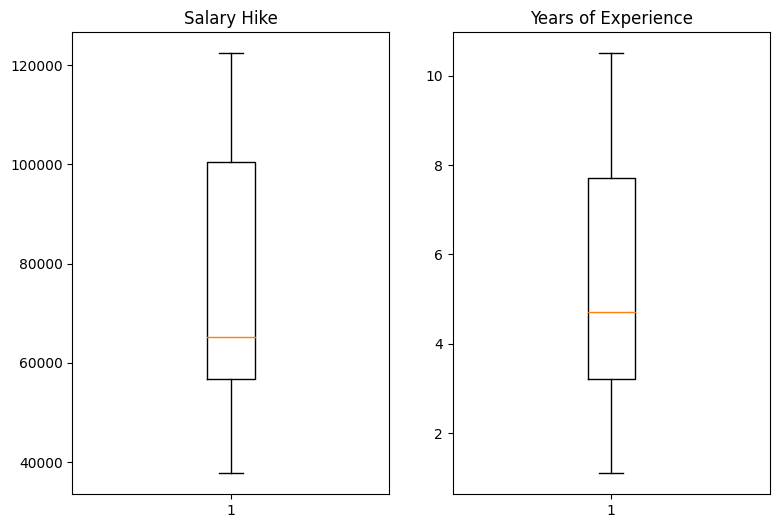

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(salary['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(salary['YearsExperience'])
plt.title('Years of Experience')
plt.show()

As you can see there is no outliers

**Checking the correlaion between variables**

In [ ]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Visualization of correlation of x and y**

<Axes: xlabel='YearsExperience', ylabel='Salary'>

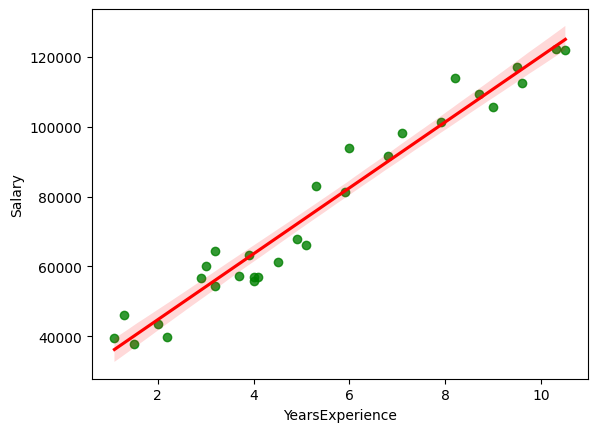

In [ ]:
import seaborn as sns
sns.regplot(x='YearsExperience',y='Salary',data=salary,line_kws={'color':"Red"},scatter_kws={'color':"Green"})


**As you can see above**

*   There is good correlation between the two variable.
*   The score is more than 0.8 which is a good sign



**Checking for Homoscedasticity or Hetroscedasticity**

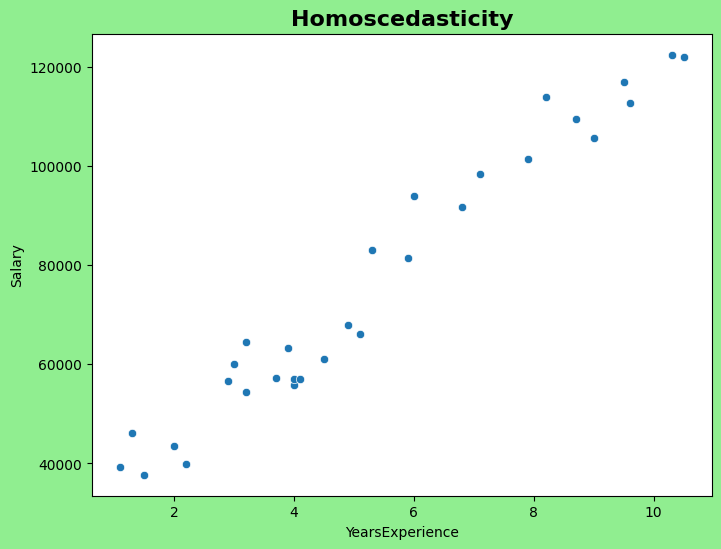

In [ ]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = salary['YearsExperience'], y = salary['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

**As you can see in above graph**

*   It shows as the Salary Increases the Years of Experience increases variation is ocnstant along the way in data
*   The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity




In [ ]:
salary.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

**Feature engineering**

**Trying different transformation of data to estimate the normal distribution and remove any skewness**

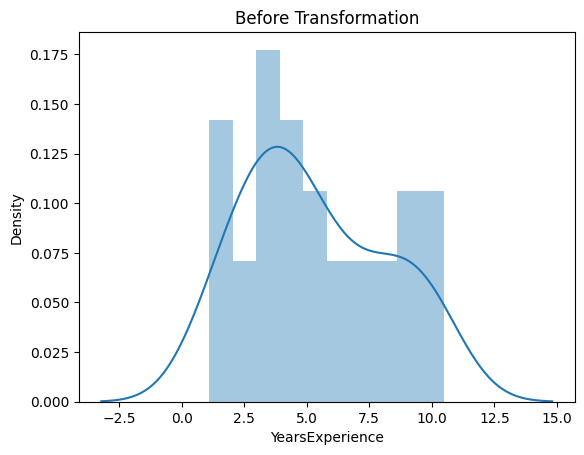

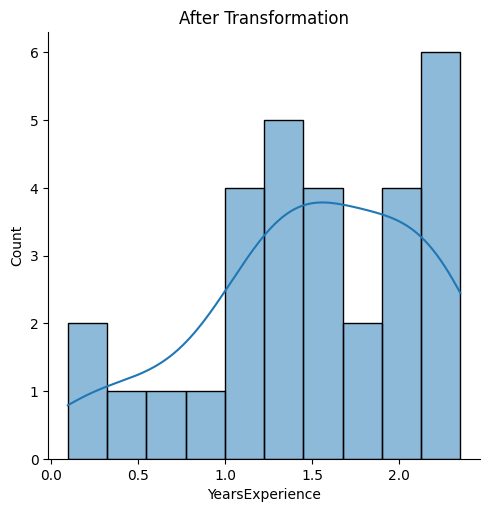

In [ ]:
sns.distplot(salary['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(salary['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()


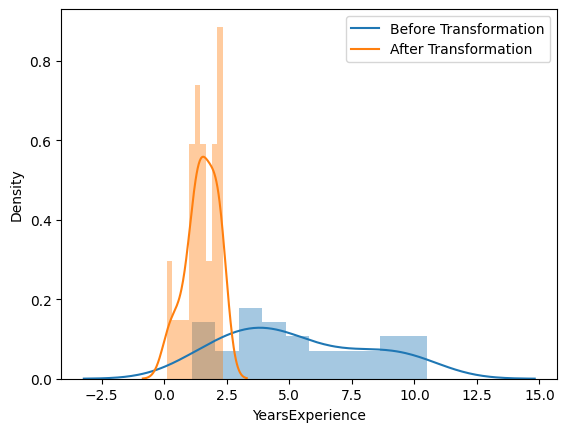

In [ ]:
labels = ['Before Transformation','After Transformation']
sns.distplot(salary['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(salary['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

**As you can see**

* How log transformation affects the data and it scales the values down.  
* Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)  





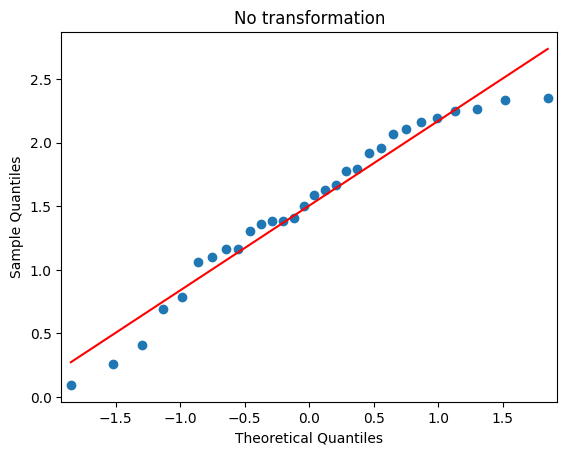

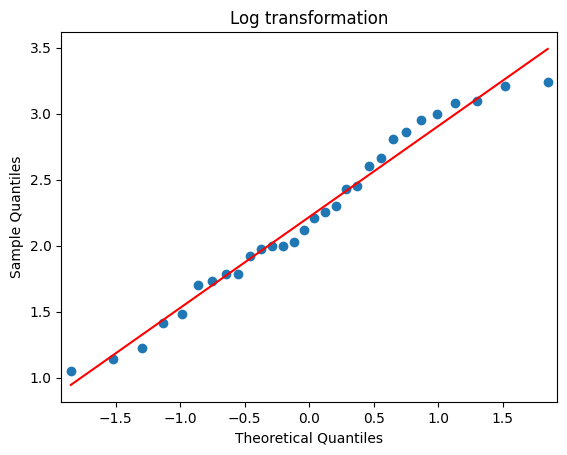

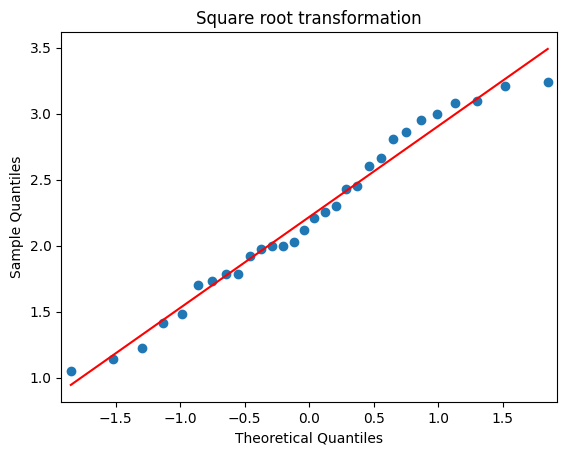

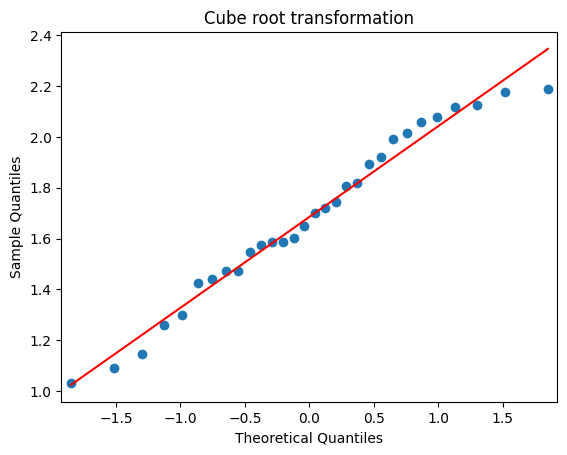

In [ ]:
smf.qqplot(np.log(salary['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(salary['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(salary['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(salary['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

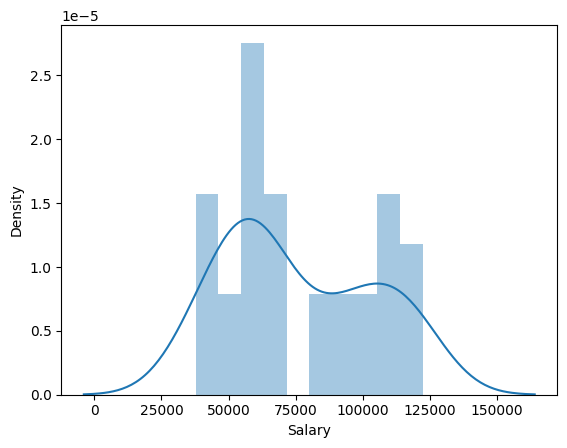

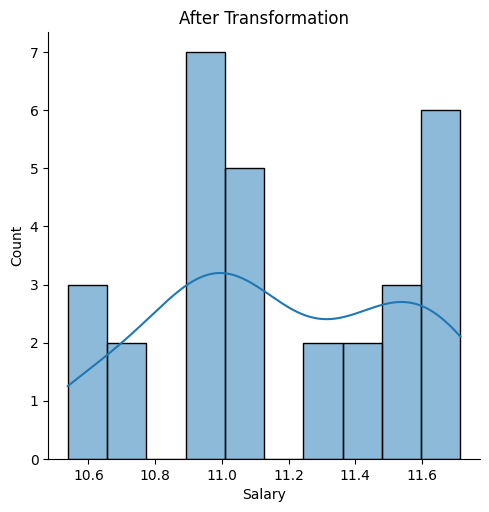

In [30]:
labels = ['Before Transformation','After Transformation']
sns.distplot(salary['Salary'], bins = 10, kde = True)
sns.displot(np.log(salary['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

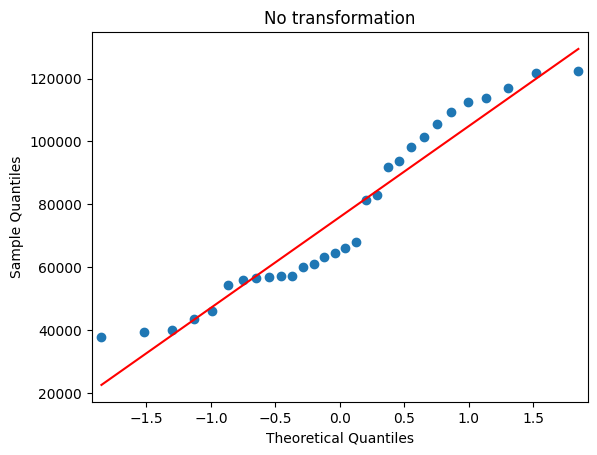

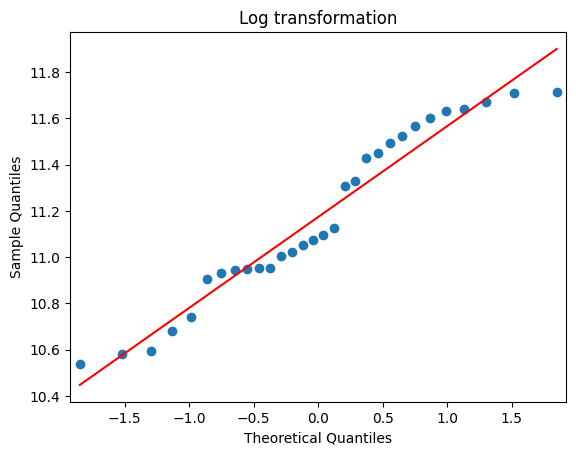

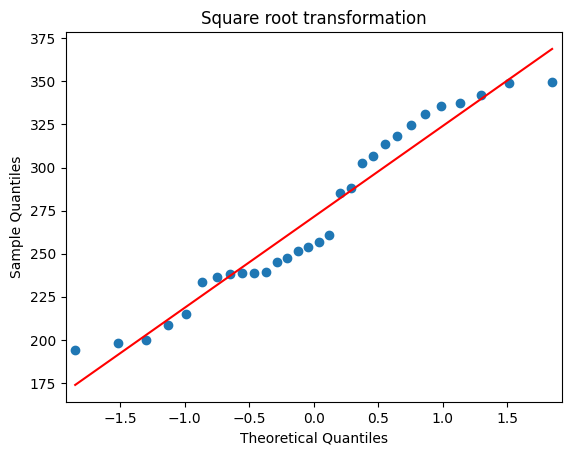

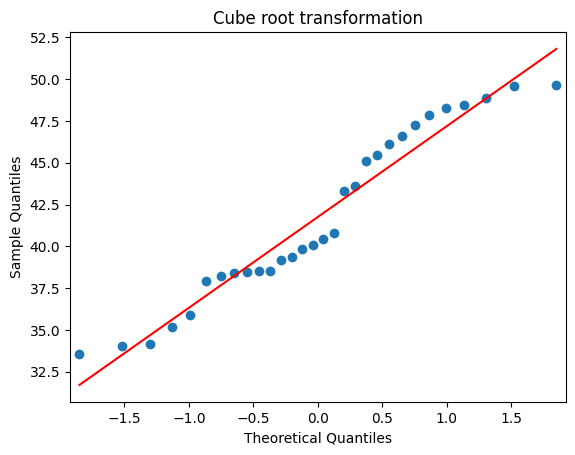

In [33]:
import statsmodels.api as smf
smf.qqplot(salary['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(salary['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(salary['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(salary['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

**Important Note**

We only Perform any data transformation when the data is skewed or not normal distribution N(0,1)

**Fitting a linear regression model**

Using ordinary least squares(OLS) Regression

In [38]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = salary).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.14e-20
Time:                        05:51:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As you can notice in the above model**

*   The R-squared and Adjusted R-squared scores are above 0.85.
*  (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

*   F-statitics is quite high as well and yes desire it to be higher
*  But log-likelihood is quite very low far away from 0 and AIC and BIC score are much higher for this model

* Lets Try some data transformation to check whether these scores can get any better than this.  



**Square root transformation of data**

In [40]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = salary).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           7.58e-19
Time:                        05:55:50   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As you can notice in the above model**





*   The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
*   (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
*   F-statitics has gotten a little lower for this model than previous.
*   But log-likelihood got better than before close to 0 higher than previous model and AIC and BIC score are now much better for this model
*   Lets Try some data transformation to check whether these scores can get any better than this.










**Cuberoot transformation of data**

In [41]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = salary).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           6.37e-18
Time:                        06:03:18   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Log transformation of data**

In [42]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = salary).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           7.40e-16
Time:                        06:04:05   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Testing**

As Y = Beta0 + Beta1*(X)

**Finding Coefficient Parameters (Beta0 and Beta1 values)**

In [43]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

Here, (Intercept) Beta0 value = 25792.20 & (YearsExperience) Beta1 value = 9449.96

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [44]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


(Intercept) Beta0: tvalue=11.34 , pvalue=5.511950e-12

(daily) Beta1: tvalue=24.95, pvalue= 1.143068e-20

As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(YearsExperience) variable has good slope and variance w.r.t Y(Salary) variable.

R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [45]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%

**Residual Analysis**

Test for Normality of Residuals (**Q-Q Plot**)

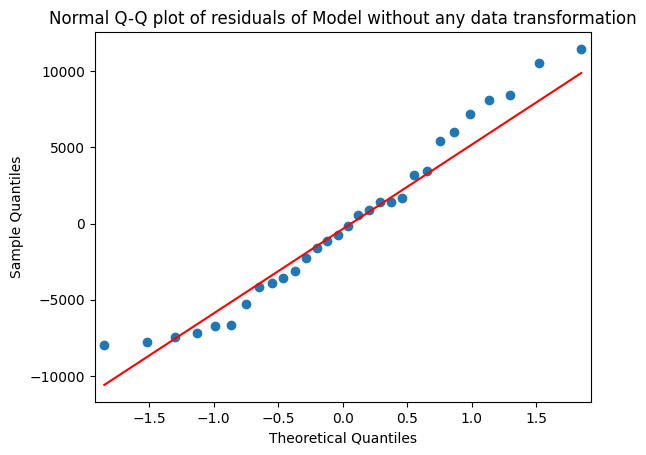

In [46]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

**As you can notice in the above plot**

The first model follows normal distribution

**Residual Plot to check Homoscedasticity or Hetroscedasticity**

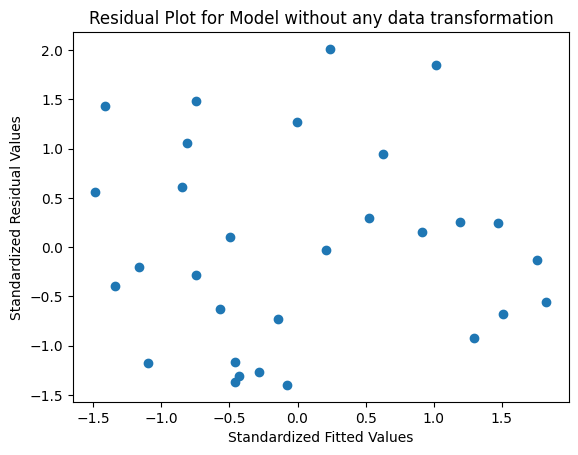

In [47]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

**As you can notice in the above plots**


*  The Model have Homoscedasciticity.
*  The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
* Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed  






**Model validation**

Comparing different models with respect to the Root Mean Squared Errors

In [48]:
from sklearn.metrics import mean_squared_error

In [50]:
model1_pred_y =np.square(model1.predict(salary['YearsExperience']))
model2_pred_y =pow(model2.predict(salary['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(salary['YearsExperience']))

In [51]:
model1_rmse =np.sqrt(mean_squared_error(salary['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(salary['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(salary['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174318 
model2= 6232.815455835847 
model3= 7219.716974372806


In [52]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

**As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values**

Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted R-squared value

**Predicting Values**

In [56]:
# first model results without any transformation
predicted = pd.DataFrame()
predicted['YearsExperience'] = salary.YearsExperience
predicted['Salary'] = salary.Salary
predicted['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(salary.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
